In [1]:
# various imports

import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output
from sklearn import preprocessing
from sklearn.utils import shuffle

In [2]:
# i import my implementation of multi-layer perceptron

from MLP import *

In [3]:
# i define a dataset to test my nets on 1-dimensional regression task. the dataset is composed of a number of patterns 
# ( x, f_target(x)+some_noise ),
# generated as follows:

# definition of the function to do regression on
f_target = lambda x: x**3 - x**2

#generate data
tx = np.sort( ( 2*np.random.rand(300)-1 )*2 ) # random sorted input
ty = np.array( [ f_target(x) + (2*np.random.rand()-1) for x in tx ] ) # desired output, plus some noise

# rescale input
tx = (tx-np.min(tx))/(np.max(tx)-np.min(tx))

# give data the proper shape
tx = tx.reshape(-1,1)
ty = ty.reshape(-1,1)
data = np.hstack((tx,ty))

13.569905585214627


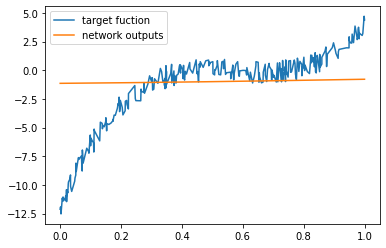

In [9]:
# to test training and performance of the net, i generate one and then i see how it goes before training, then train it, and after 
# i can see how it goes after training:

# define a multi-layer-perceptron, and run it on the test samples even if is not trained yet, just to show that the net works 
# but spits random outputs
n = MLP(  Nh=[10], Nu=1, Ny=1, f='tanh', f_out='ide', w_range=.7,w_scale=2)
outs = n.supply_sequence(tx).reshape(-1) 

# plot the target function
plt.plot(tx,ty,label='target fuction')

#plot the output of the untrained net, then print Mean Sqaured Error (MSE)
plt.plot(tx,outs,label='network outputs')
plt.legend()
print( MSE(outs,ty))

In [10]:
# now i train my net. In this case i use classical momentum with no regularization. after training i plot some convergence-curves 
# using data i collected during training

init_w = np.copy(n.w)

# train the net with momentum training
g_m,e_m,t_m = n.momentum_train(tx, ty,alpha=5e-02,beta=5e-03,epsilon=1e-12,tresh=.05,max_epochs=2000)

# train the network with bundle method
n.w = init_w
from utils import proximal_bundle_method
g_b, e_b, t_b = proximal_bundle_method(n, tx, ty, mu=10, reg_param=1e-12)

optimal
0.0008503401105466374


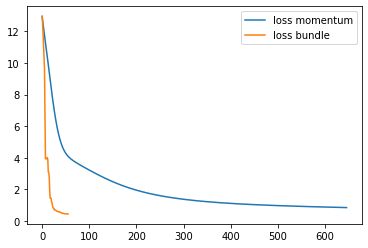

In [11]:
# plot the results with iterations
plt.plot( e_m,label='loss momentum')
plt.plot( e_b,label='loss bundle')
plt.legend()

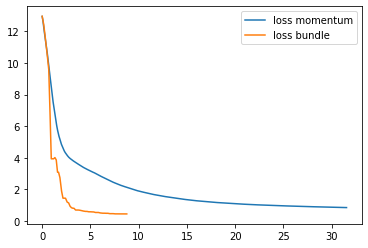

In [12]:
# plot the results with time
plt.plot(t_m, e_m,label='loss momentum')
plt.plot(t_b, e_b,label='loss bundle')
plt.legend()

0.3281441896847188


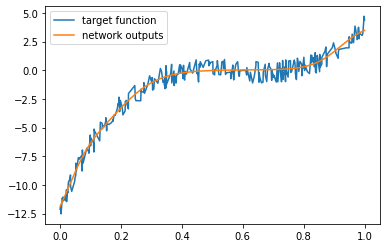

In [13]:
# now that i trained my net, i can see how it performs (after training) on the target function (training set). Hopefully, one can
# see that the net has fit the function

# compute output of the net and reshape them in order to plot them
outs = n.supply_sequence(tx)
outs = outs.reshape(ty.shape)

# plot the target function and otuput of the trained network
plt.plot(tx,ty,label='target function')
plt.plot(tx,outs.reshape(-1),label='network outputs')
plt.legend()

print( MSE(outs,ty))

In [14]:
n.w

array([array([[ -2.19304332,  -0.95495637],
       [-10.90177265,  10.01898692],
       [ -0.48097989,  -1.68547561],
       [ -4.69392016,  -6.56323589],
       [  2.82130377,  -6.1463765 ],
       [ -2.35436613,  -2.11089194],
       [ 14.36211024,  -0.44452683],
       [  2.0136488 ,   2.20708345],
       [  7.72004413,  -1.51653594],
       [-10.03723405,  -1.41519169]]),
       array([[-0.26888684, -2.02474597,  3.41363339,  0.11386538,  4.64775506,
        -2.27499775,  3.66170244,  1.52953508,  3.33762601, -2.40417917,
        -3.35791614]])], dtype=object)